In [ ]:
#intall pycaret
!pip install pycaret-ts-alpha

In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
import plotly.graph_objs as go#visualization
from plotly.offline import iplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
import plotly.express as px

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading data set
path = "/content/drive/MyDrive/Colab Notebooks/clean_dataset.csv"
data3= pd.read_csv(path)

In [ ]:
def create_df(data3, country):
    #Selecting the 7 key columns for country in dataset
    data3=data3[data3['Location']==country].copy()
    data3=data3[['Date','Total Cases','New Cases',
         'Total deaths','New deaths',
         'people vaccinated per hundred', 'people fully vaccinated per hundred',
          'new cases per million']].copy()

    #Convert to datetime
    data3['Date'] = pd.DatetimeIndex(data3['Date'])
    return data3

In [ ]:
data3_brazil=create_df(data3, 'Brazil')

In [ ]:
data3_brazil=data3_brazil.loc[:,['Date','New Cases']]
data3_brazil=data3_brazil.set_index('Date')

In [ ]:
data3_brazil.head()

,New Cases
Date,
2020-02-26,1
2020-02-27,0
2020-02-28,0
2020-02-29,1
2020-03-01,0


In [ ]:
fig1= px.line(data3_brazil, template = 'plotly_dark',title='New cases over the time in Brazil')
fig1.show()

In [ ]:
from pycaret.time_series import *
setup(data3_brazil, fh = 7, fold = 3, session_id = 123)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: e633
INFO:logs:self.variable_keys: {'gpu_param', 'idx', 'y', 'strictly_positive', '_all_metrics', 'html_param', 'X_train_transformed', 'X', 'memory', 'X_test', 'display_container', 'fh', 'enforce_pi', 'data', 'log_plots_param', 'X_transformed', 'pipeline', 'variable_keys', '_all_models', 'all_sp_values', 'seed', 'experiment__', 'y_transformed', 'fold_groups_param_full', 'y_test', 'y_train_transformed', 'X_test_transformed', 'enforce_exogenous', '_gpu_n_jobs_param', 'USI', 'exp_id', 'logging_param', 'seasonal_period', 'X_train', 'y_test_transformed', '_ml_usecase', 'approach_type', 'master_model_container', 'fold_param', '_all_models_internal', 'primary_sp_to_use', 'index_type', 'y_train', 'seasonality_present', 'exogenous_present', 'fold_generator', 'n_jobs_param', 'exp_name_log', '_avail

,Description,Value
0,session_id,123
1,Target,New Cases
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(739, 1)"
5,Train data shape,"(732, 1)"
6,Test data shape,"(7, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.52s...............


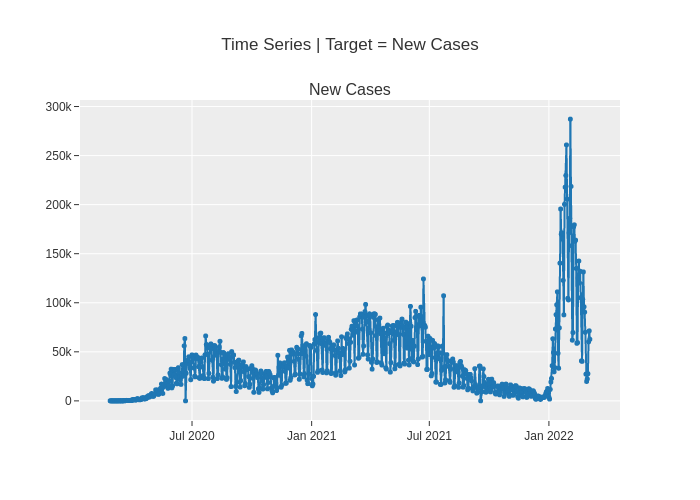

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot='ts')

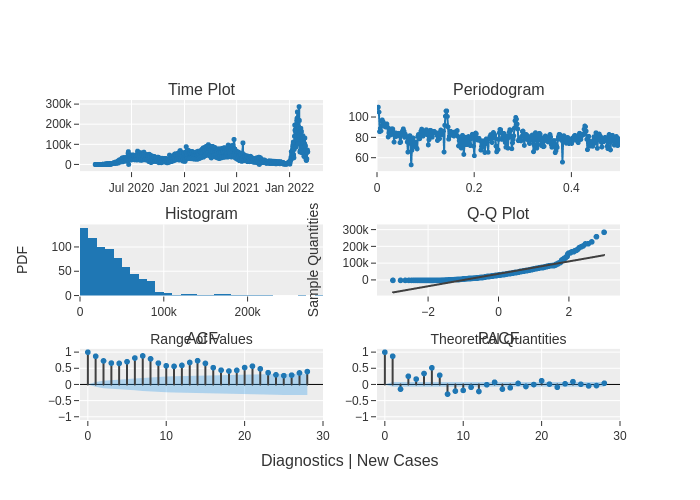

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot='diagnostics')

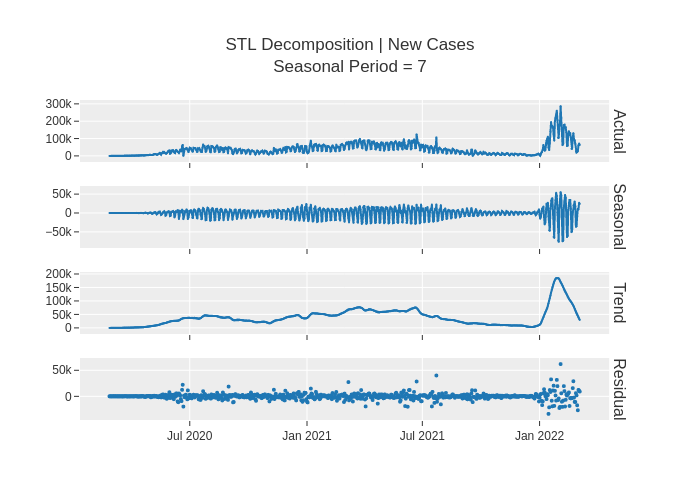

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'decomp_stl')

In [ ]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
arima,ARIMA,28819.3534,36954.5477,0.2626,0.2235,3.5545,2.3409,-0.0146,0.4500
auto_arima,Auto ARIMA,27797.747,31602.1366,0.2634,0.2238,3.4588,2.0161,0.2506,84.8267
snaive,Seasonal Naive Forecaster,31839.381,38677.5925,0.3197,0.2634,3.9262,2.4501,-0.1056,0.0267
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,34796.5371,40952.678,0.3288,0.2736,4.3068,2.5998,-0.2787,0.1500
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,28737.8208,34062.2408,0.3732,0.2907,3.5567,2.1529,0.1354,0.1533
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,32882.3011,35376.1392,0.3664,0.2967,4.0601,2.2376,0.0743,0.1667
ets,ETS,36803.19,42010.526,0.3562,0.3006,4.5658,2.6674,-0.2933,0.0900
naive,Naive Forecaster,32941.2857,44357.5714,0.5042,0.3264,4.046,2.7911,-0.5435,1.0500
theta,Theta Forecaster,33050.3071,44515.9105,0.5063,0.3272,4.059,2.8011,-0.5548,0.0700
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,36250.4937,38711.6981,0.431,0.3309,4.4742,2.4473,-0.1173,0.1400


INFO:logs:master_model_container: 27
INFO:logs:display_container: 2
INFO:logs:ARIMA(seasonal_order=(0, 1, 0, 7))
INFO:logs:compare_models() successfully completed......................................


In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,27797.747,31602.1366,0.2634,0.2238,3.4588,2.0161,0.2506,83.9933
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,28737.8208,34062.2408,0.3732,0.2907,3.5567,2.1529,0.1354,0.1467
arima,ARIMA,28819.3534,36954.5477,0.2626,0.2235,3.5545,2.3409,-0.0146,0.1500
snaive,Seasonal Naive Forecaster,31839.381,38677.5925,0.3197,0.2634,3.9262,2.4501,-0.1056,0.0233
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,32882.3011,35376.1392,0.3664,0.2967,4.0601,2.2376,0.0743,0.1667
naive,Naive Forecaster,32941.2857,44357.5714,0.5042,0.3264,4.046,2.7911,-0.5435,0.0233
theta,Theta Forecaster,33050.3071,44515.9105,0.5063,0.3272,4.059,2.8011,-0.5548,0.0533
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,34796.5371,40952.678,0.3288,0.2736,4.3068,2.5998,-0.2787,0.1467
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,36250.4937,38711.6981,0.431,0.3309,4.4742,2.4473,-0.1173,0.1467
exp_smooth,Exponential Smoothing,36329.6823,40801.6747,0.3609,0.3488,4.5174,2.5986,-0.2422,0.7267


INFO:logs:master_model_container: 54
INFO:logs:display_container: 3
INFO:logs:AutoARIMA(random_state=123, sp=7, suppress_warnings=True)
INFO:logs:compare_models() successfully completed......................................


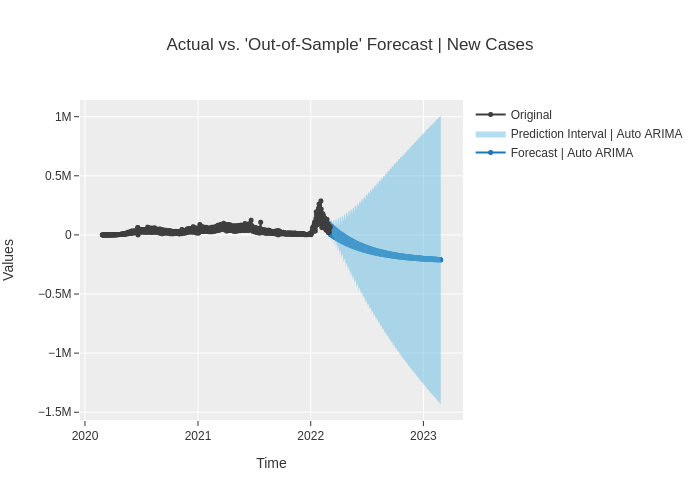

INFO:logs:Visual Rendered Successfully


In [ ]:
# forecast in unknown future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 365})

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-02-05,36968.4116,53397.9798,0.2805,0.2307,4.6942,3.4961,-0.3313
1,2022-02-12,29315.1734,33216.1822,0.2528,0.2236,3.5719,2.0522,-0.1025
2,2022-02-19,20174.4752,24249.4809,0.2546,0.2163,2.3975,1.4746,0.3901
Mean,NaT,28819.3534,36954.5477,0.2626,0.2235,3.5545,2.3409,-0.0146
SD,NaT,6865.0542,12189.8941,0.0126,0.0059,0.9377,0.8502,0.3010


INFO:logs:master_model_container: 55
INFO:logs:display_container: 7
INFO:logs:ARIMA(seasonal_order=(0, 1, 0, 7))
INFO:logs:create_model() successfully completed......................................


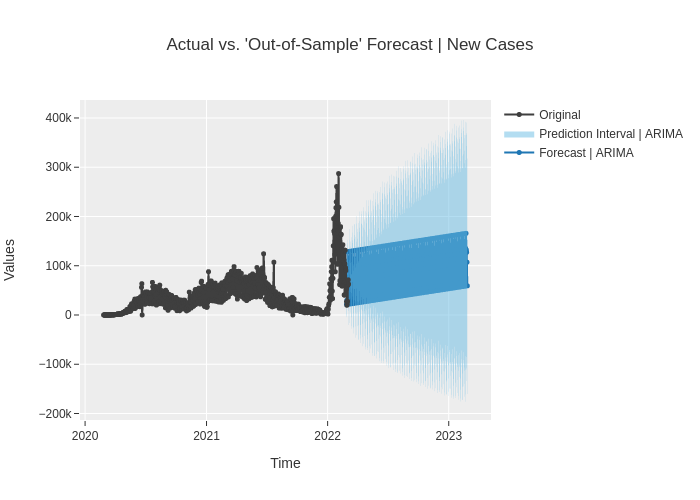

INFO:logs:Visual Rendered Successfully


In [ ]:
arima=create_model('arima')
plot_model(arima, plot = 'forecast', data_kwargs = {'fh' : 365})

In [ ]:
# finalize model
final_best = finalize_model(best)
# generate predictions
predict_model(final_best, fh = 365)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fb11676ea30>, estimator=AutoARIMA(random_state=123, sp=7, suppress_warnings=True), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing AutoARIMA(random_state=123, sp=7, suppress_warnings=True)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fb11676ea30>, estimator=AutoARIMA(random_state=123, sp=7, suppress_warnings=True), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Decl

,y_pred
2022-03-06,-8162.7689
2022-03-07,-27348.1098
2022-03-08,4095.9150
2022-03-09,18795.6242
2022-03-10,30417.8315
...,...
2023-03-01,-288841.7236
2023-03-02,-288632.5253
2023-03-03,-288490.0685
2023-03-04,-289051.5071
